Code for generating report graphics.
Code was partially generated by ChatGPT.
Architecture diagram was made with external software.

In [2]:
import matplotlib.pyplot as plt
import seaborn as skadi
import pandas as pd
import os
from PIL import Image

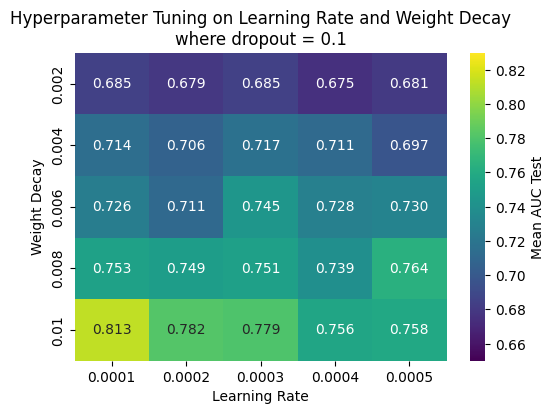

In [3]:
file = 'results_10754991.csv'
df = pd.read_csv(file)

# drop 'checkpoint' and 'mean_auc' columns
df2 = df.drop(columns=['checkpoint', 'mean_auc'])

# filter dropout collumn
filtered = df2[df2['dropout'] == 0.1]

heatmap_data = filtered.pivot(index='learning_rate', columns='weight_decay', values='mean_auc_test')

plt.figure(figsize=(6, 4))
skadi.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".3f", 
    cmap='viridis', 
    cbar_kws={'label': 'Mean AUC Test'},
    vmin=0.65,
    vmax=0.83,
)

# Update title and labels
plt.title('Hyperparameter Tuning on Learning Rate and Weight Decay\nwhere dropout = 0.1')
plt.xlabel('Learning Rate')
plt.ylabel('Weight Decay')
plt.show()

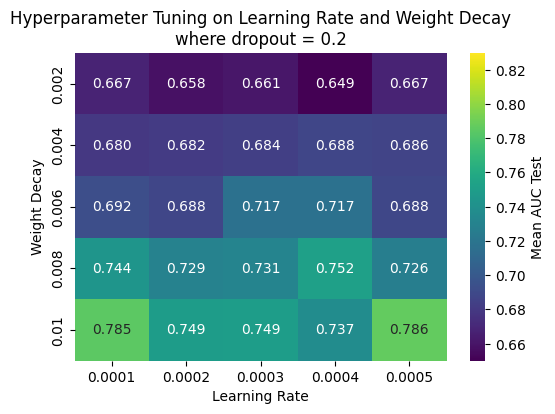

In [4]:
# drop 'checkpoint' and 'mean_auc' columns
df3 = df.drop(columns=['checkpoint', 'mean_auc'])

# filter dropout collumn
filtered = df3[df3['dropout'] == 0.2]

heatmap_data = filtered.pivot(index='learning_rate', columns='weight_decay', values='mean_auc_test')

plt.figure(figsize=(6, 4))
skadi.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".3f", 
    cmap='viridis', 
    cbar_kws={'label': 'Mean AUC Test'},
    vmin=0.65,
    vmax=0.83,
)

# Update title and labels
plt.title('Hyperparameter Tuning on Learning Rate and Weight Decay\nwhere dropout = 0.2')
plt.xlabel('Learning Rate')
plt.ylabel('Weight Decay')
plt.show()

In [ ]:
# images handpicked from the dataset

base_images = os.path.join(os.getcwd(), 'images')

if not os.path.exists(base_images):
    print("cry yourself to sleep and do it manually")

fix_map_dir = os.path.join(base_images, 'fix_maps')
sal_map_dir = os.path.join(base_images, 'sal_maps')

sal_map_prefix = 'saliency_'
fix_map_suffix = '_fixMap.jpg'

filepaths = {}
filenames = {}

#load 'syntheticData1.jpeg' and get its width and height
synthetic_data = Image.open(os.path.join(base_images, 'syntheticData1.jpeg'))
width, height = synthetic_data.size

#match each base image with its corresponding saliency map and fixation map
for base_img in os.listdir(base_images):
    if base_img.endswith('.jpeg'):
        base_img_path = os.path.join(base_images, base_img)
        sal_img_path = os.path.join(sal_map_dir, sal_map_prefix + base_img)
        fix_img_path = os.path.join(fix_map_dir, base_img.replace('.jpeg', fix_map_suffix))
        
        #get file names
        sal_img_name = sal_map_prefix + base_img
        fix_img_name = base_img.replace('.jpeg', fix_map_suffix)

        #check for existence
        if not os.path.exists(sal_img_path):
            print(f'{sal_img_path} does not exist')
            continue
        if not os.path.exists(fix_img_path):
            print(f'{fix_img_path} does not exist')
            continue



        filenames[base_img] = [sal_img_name, fix_img_name]
        filepaths[base_img] = [base_img_path, sal_img_path, fix_img_path]

columns = []
#Load images and align them into columns
for base_img, paths in filepaths.items():
    base = Image.open(paths[0])
    sal_map = Image.open(paths[1])
    fix_map = Image.open(paths[2])

    #resize images to 'width' x 'height' 
    base = base.resize((width, height))
    sal_map = sal_map.resize((width, height))
    fix_map = fix_map.resize((width, height))

    column = Image.new('RGB', (base.width, base.height * 3))
    offset = 0
    column.paste(base, (0, offset))
    offset += base.height
    column.paste(sal_map, (0, offset))
    offset += sal_map.height
    column.paste(fix_map, (0, offset))
    columns.append(column)

total_width = sum([column.width for column in columns])
total_height = max([column.height for column in columns])
table = Image.new('RGB', (total_width, total_height))

x_offset = 0
for column in columns:
    table.paste(column, (x_offset, 0))
    x_offset += column.width

table.save('table.png')


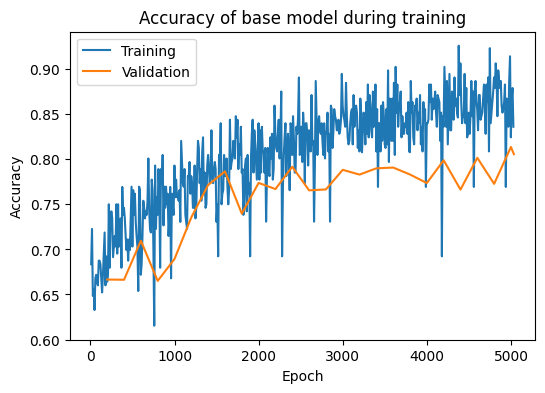

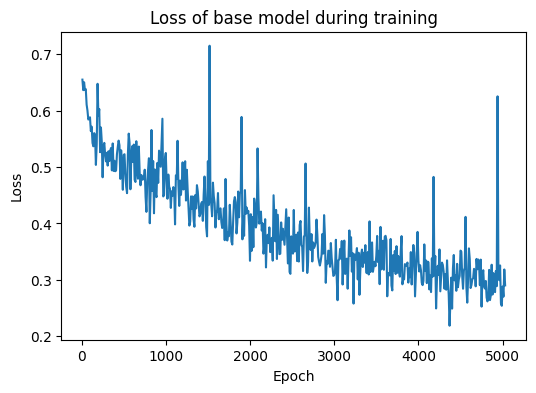

In [31]:
# CSV filed obtained directly from tensorboard of our model

accuracy_train = 'accuracy_train.csv'
loss_train = 'loss_train.csv'
accuracy_val = 'csv.csv'

df_acc_train = pd.read_csv(accuracy_train)
df_loss_train = pd.read_csv(loss_train)
df_acc_val = pd.read_csv(accuracy_val)

plt.figure(figsize=(6, 4))
plt.plot(df_acc_train['Step'], df_acc_train['Value'], label='Training')
plt.plot(df_acc_val['Step'], df_acc_val['Value'], label='Validation')
plt.title('Accuracy of base model during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(df_loss_train['Step'], df_loss_train['Value'])
plt.title('Loss of base model during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
